# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
# Read 2017 SAT and 2017 ACT data from csv files.
sat_2017_df = pd.read_csv("../data/sat_2017.csv")
act_2017_df = pd.read_csv("../data/act_2017.csv")

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
# Display first 10 rows for 2017 SAT data.
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# Display first 10 rows for 2017 ACT data.
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The data contains breakdown of the average SAT and ACT scores in each state, as well as the state participation rates.

#### 4a. Does the data look complete? 

In [5]:
# Print summary of SAT data.
sat_2017_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
# Print summary of ACT data.
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


Answer: Yes, all 50 states and the federal district (Washington, D.C.) are represented in both sets of data. There are no missing values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
# Print summary statistics for SAT data, including minimum and maximum values.
sat_2017_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [8]:
sat_2017_df.sort_values(by='Math').head(3)[['State','Math']]

,State,Math
20,Maryland,52
8,District of Columbia,468
7,Delaware,492


In [9]:
# Print summary statistics for ACT data, including minimum and maximum values.
act_2017_df.describe().T

,count,mean,std,min,25%,50%,75%,max
English,52.0,20.919231,2.332132,16.3,19.000,20.55,23.300,25.5
Math,52.0,21.173077,1.963602,18.0,19.400,20.90,23.100,25.3
Reading,52.0,22.001923,2.048672,18.1,20.475,21.70,24.125,26.0
Science,52.0,21.040385,3.151113,2.3,19.900,21.15,22.525,24.9


In [10]:
act_2017_df.sort_values(by='Science').head(3)[['State','Science']]

,State,Science
21,Maryland,2.3
29,Nevada,18.2
25,Mississippi,18.8


Answer:
- Minimum/maximum possible value for each test/subtest:

|Test|Min|Max|
|-|-|-|
|SAT Subtest|200|800|
|SAT Total|400|1600|
|ACT|1|36|

- The SAT Math score and ACT Science score for Maryland are erroneous.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
# Fix SAT Math score for Maryland
sat_2017_df.loc[[20],["Math"]] = 524

# Fix ACT Science score for Maryland
act_2017_df.loc[[21],["Science"]] = 23.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
# Display data types for 2017 SAT data.
sat_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
# Display data types for 2017 ACT data.
act_2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
- Participation rates should be formatted as numeric type.
- Data type for Composite scores in the ACT data should be a float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
def pct_to_dec(pct_value):
    """Convert percentage value with percent sign, "%", to decimal value.
    
    Parameters
    ----------
    pct_value : str
        Percentage value with the percent sign, e.g. "83%".
        
    Returns
    -------
    float
        Percentage expressed in decimal value, e.g. 0.83.
        
    Raises
    ------
    TypeError
        If pct_value is a non-string value.
    """
    # Check if pct_value is a string value.
    if type(pct_value) != str:
        raise TypeError("Percentage value is not a string value.")
    
    # Remove "%" using string replace() method.
    pct_value = pct_value.replace("%", "")
    
    # Convert string value to float.
    pct_value = float(pct_value)
    
    # Divide by 100 to get decimal value. Return the decimal value.
    return pct_value / 100
    
# Convert participation rates from percentage to decimal value using apply() function.
sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(pct_to_dec)
act_2017_df['Participation'] = act_2017_df['Participation'].apply(pct_to_dec)

- Fix any individual values preventing other columns from being the appropriate type.

In [15]:
#code
def strip_str(input_str):
    """Strip non-numeric characters from a decimal value that 
    is formatted as a string.
    
    Parameters
    ----------
    input_str : str
        A string value.
        
    Returns
    -------
    str
        Decimal value in string type.
        
    Raises
    ------
    TypeError
        If input_str is a non-string value.
    """
    # Check if input_str is a string value.
    if type(input_str) != str:
        raise TypeError("Input parameter is not a string value.")
    
    # Iterate through each character in the string and if it is a digit
    # or decimal character, concatenate to a new string. Return string value.
    return "".join(c for c in input_str if c.isdigit() or c in ".")

# Remove non-numeric characters from Composite scores in the ACT data.
act_2017_df['Composite'] = act_2017_df['Composite'].apply(strip_str)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
# Convert Composite scores in the ACT data to float type.
act_2017_df['Composite'] = act_2017_df['Composite'].apply(float)

- Display the data types again to confirm they are correct.

In [17]:
# Display data types for SAT data.
sat_2017_df.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [18]:
# Display data types for ACT data.
act_2017_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [19]:
# Change column names to lowercase.
sat_2017_df.columns = map(lambda x: x.lower(), sat_2017_df.columns)
# Replace space with underscore.
sat_2017_df.columns = map(lambda x: x.replace(" ", "_"), sat_2017_df.columns)
# Add suffix, "_sat_2017", to column names for SAT data, except for state.
sat_2017_df.columns = map(lambda x: "sat_2017_" + x if x != "state" else x, sat_2017_df.columns)

# Change column names to lowercase.
act_2017_df.columns = map(lambda x: x.lower(), act_2017_df.columns)
# Replace space with underscore.
act_2017_df.columns = map(lambda x: x.replace(" ", "_"), act_2017_df.columns)
# Add suffix, "_act_2017", to column names for ACT data except for state.
act_2017_df.columns = map(lambda x: "act_2017_" + x if x != "state" else x, act_2017_df.columns)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|_object_|2017 SAT Scores<br>2017 ACT Scores |50 states and the federal district (Washington, D.C.) of the United States.|
|**sat_2017_participation**|_float_|2017 SAT Scores|The participation rate of the 2017 SAT in each state.|
|**sat_2017_evidence-based_reading_and_writing**|_integer_|2017 SAT Scores|The average score for the 2017 SAT Evidence-Based Reading and Writing section in each state.|
|**sat_2017_math**|_integer_|2017 SAT Scores|The average score for the 2017 SAT Math section in each state.|
|**sat_2017_total**|_integer_|2017 SAT Scores|The average total score for the 2017 SAT in each state.|
|**act_2017_participation**|_float_|2017 ACT Scores|The participation rate of the 2017 ACT in each state.|
|**act_2017_english**|_float_|2017 ACT Scores|The average score for the 2017 ACT English test in each state.|
|**act_2017_math**|_float_|2017 ACT Scores|The average score for the 2017 ACT Math test in each state.|
|**act_2017_reading**|_float_|2017 ACT Scores|The average score for the 2017 ACT Reading test in each state.|
|**act_2017_science**|_float_|2017 ACT Scores|The average score for the 2017 ACT Science test in each state.|
|**act_2017_composite**|_float_|2017 ACT Scores|The average composite score for the 2017 ACT in each state.|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [20]:
# Drop row where state is equal to "National".
act_2017_df.drop(act_2017_df.index[act_2017_df['state'] == "National"], inplace = True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [21]:
# Join 2017 SAT and ACT dataframes using state as key.
combined_2017_df = sat_2017_df.merge(act_2017_df, on='state')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [22]:
# Save merged dataframe to csv.
combined_2017_df.to_csv("../data/combined_2017.csv", index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [23]:
# Read 2018 SAT and 2018 ACT data from csv files.
sat_2018_df = pd.read_csv("../data/sat_2018.csv")
act_2018_df = pd.read_csv("../data/act_2018.csv")

In [24]:
# Display first 10 rows for 2018 SAT data.
sat_2018_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076
5,Colorado,100%,519,506,1025
6,Connecticut,100%,535,519,1053
7,Delaware,100%,505,492,998
8,District of Columbia,92%,497,480,977
9,Florida,97%,522,493,1014


In [25]:
# Display first 10 rows for 2018 ACT data.
act_2018_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.3,19.6,19.0,19.1
1,Alaska,33%,19.8,20.6,21.6,20.7,20.8
2,Arizona,66%,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100%,19.1,18.9,19.7,19.4,19.4
4,California,27%,22.5,22.5,23.0,22.1,22.7
5,Colorado,30%,23.9,23.2,24.4,23.5,23.9
6,Connecticut,26%,26.0,24.8,26.1,24.9,25.6
7,Delaware,17%,23.7,23.1,24.5,23.4,23.2
8,District of Columbia,32%,23.7,22.7,24.4,23.0,23.6
9,Florida,66%,19.2,19.3,21.1,19.5,19.9


In [26]:
# Print summary of 2018 SAT data.
sat_2018_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [27]:
# Print summary of 2018 ACT data.
act_2018_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State            51 non-null object
Participation    51 non-null object
English          51 non-null float64
Math             51 non-null float64
Reading          51 non-null float64
Science          51 non-null float64
Composite        51 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [28]:
# Display data types for 2018 SAT data.
sat_2018_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [29]:
# Display data types for 2018 ACT data.
act_2018_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [30]:
# Convert participation rates from percentage to decimal value using apply() function.
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(pct_to_dec)
act_2018_df['Participation'] = act_2018_df['Participation'].apply(pct_to_dec)

In [31]:
# Change column names to lowercase.
sat_2018_df.columns = map(lambda x: x.lower(), sat_2018_df.columns)
# Replace space with underscore.
sat_2018_df.columns = map(lambda x: x.replace(" ", "_"), sat_2018_df.columns)
# Add suffix, "_sat_2018", to column names for SAT data, except for state.
sat_2018_df.columns = map(lambda x: "sat_2018_" + x if x != "state" else x, sat_2018_df.columns)

# Change column names to lowercase.
act_2018_df.columns = map(lambda x: x.lower(), act_2018_df.columns)
# Replace space with underscore.
act_2018_df.columns = map(lambda x: x.replace(" ", "_"), act_2018_df.columns)
# Add suffix, "_act_2018", to column names for ACT data except for state.
act_2018_df.columns = map(lambda x: "act_2018_" + x if x != "state" else x, act_2018_df.columns)

In [32]:
# Join 2018 SAT and ACT dataframes using state as key.
combined_2018_df = sat_2018_df.merge(act_2018_df, on='state')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [33]:
# Join 2017 and 2018 dataframes using state as key.
final_df = combined_2017_df.merge(combined_2018_df, on='state')

# Save merged dataframe to csv.
final_df.to_csv("../data/final.csv", index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [34]:
# Output descriptive statistics for each numeric feature.
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_2017_participation,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_2017_evidence-based_reading_and_writing,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_2017_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_2017_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_2017_participation,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_2017_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_2017_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_2017_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_2017_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_2017_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [35]:
def std_dev(arr):
    """Calculate the standard deviation of list elements.
    
    Parameters
    ----------
    arr : list
        Calculate the standard deviation of these values.
        
    Returns
    -------
    float
        Return the standard deviation.
    """
    # Calculate mean.
    mean = sum(arr)/len(arr)
    # Calculate sum of the squared deviation of each element from the mean.
    sum_dev = sum([abs(i - mean) ** 2 for i in arr])
    # Return the calculated standard deviation.
    return (sum_dev/len(arr)) ** 0.5

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [36]:
# Apply standard deviation function to each numeric column using dictionary comprehension.
sd = {k: std_dev(v) for k, v in final_df.select_dtypes(include=['number']).iteritems()}
sd

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_evidence-based_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3763965409204987,
 'sat_2018_evidence-based_reading_and_writing': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94372462792965,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147}

In [37]:
# Standard deviations using numpy's std method.
{k: np.std(v) for k, v in final_df.select_dtypes(include=['number']).iteritems()}

{'sat_2017_participation': 0.3492907076664507,
 'sat_2017_evidence-based_reading_and_writing': 45.21697020437866,
 'sat_2017_math': 46.65713364485503,
 'sat_2017_total': 91.58351056778743,
 'act_2017_participation': 0.3182417575123181,
 'act_2017_english': 2.3304876369363363,
 'act_2017_math': 1.9624620273436781,
 'act_2017_reading': 2.0469029314842646,
 'act_2017_science': 1.7222161451443676,
 'act_2017_composite': 2.000786081581989,
 'sat_2018_participation': 0.3763965409204987,
 'sat_2018_evidence-based_reading_and_writing': 44.87118561762388,
 'sat_2018_math': 48.40589946919447,
 'sat_2018_total': 92.94372462792965,
 'act_2018_participation': 0.33745194881997503,
 'act_2018_english': 2.4222536143202795,
 'act_2018_math': 2.015707255555717,
 'act_2018_reading': 2.145891884510421,
 'act_2018_science': 1.8516885484833543,
 'act_2018_composite': 2.0855261815801147}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

- The manually calculated standard deviations are smaller in value than the output from pandas `describe`. The standard deviation from pandas `describe` is normalized by N-1 by default.
- The manually calculated ones match up with the output from numpy's `std` method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

##### States with highest participation rate for 2017 SAT.

In [38]:
# Highest 2017 SAT participation rate.
col = 'sat_2017_participation'
final_df.sort_values(by=col, ascending=False)[['state', col]].head(4)

,state,sat_2017_participation
8,District of Columbia,1.0
22,Michigan,1.0
6,Connecticut,1.0
7,Delaware,1.0


##### States with lowest participation rate for 2017 SAT.

In [39]:
# Lowest 2017 SAT participation rate.
col = 'sat_2017_participation'
final_df.sort_values(by=col)[['state', col]].head(3)

,state,sat_2017_participation
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


##### States with highest participation rate for 2017 ACT.

In [40]:
# Highest 2017 ACT participation rate.
col = 'act_2017_participation'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,act_2017_participation
0,Alabama,1.0
3,Arkansas,1.0
5,Colorado,1.0
17,Kentucky,1.0
18,Louisiana,1.0
23,Minnesota,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
28,Nevada,1.0


##### States with lowest participation rate for 2017 ACT.

In [41]:
# Lowest 2017 ACT participation rate.
col = 'act_2017_participation'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,act_2017_participation
19,Maine,0.08


##### States with highest participation rate for 2018 SAT.

In [42]:
# Highest 2018 SAT participation rate.
col = 'sat_2018_participation'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,sat_2018_participation
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
12,Idaho,1.0
22,Michigan,1.0


##### States with lowest participation rate for 2018 SAT.

In [43]:
# Lowest 2017 SAT participation rate.
col = 'sat_2018_participation'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,sat_2018_participation
34,North Dakota,0.02


##### States with highest participation rate for 2018 ACT.

In [44]:
# Highest 2018 ACT participation rate.
col = 'act_2018_participation'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,act_2018_participation
0,Alabama,1.0
3,Arkansas,1.0
17,Kentucky,1.0
18,Louisiana,1.0
24,Mississippi,1.0
25,Missouri,1.0
26,Montana,1.0
27,Nebraska,1.0
28,Nevada,1.0
33,North Carolina,1.0


##### States with lowest participation rate for 2018 ACT.

In [45]:
# Lowest 2018 ACT participation rate.
col = 'act_2018_participation'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,act_2018_participation
19,Maine,0.07


##### States with highest 2017 SAT mean total score.

In [46]:
# Highest 2017 SAT mean total score.
col = 'sat_2017_total'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,sat_2017_total
23,Minnesota,1295


##### States with lowest 2017 SAT mean total score.

In [47]:
# Lowest 2017 SAT mean total score.
col = 'sat_2017_total'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,sat_2017_total
8,District of Columbia,950


##### States with highest 2017 ACT mean composite score.

In [48]:
# Highest 2017 ACT mean composite score.
col = 'act_2017_composite'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,act_2017_composite
29,New Hampshire,25.5


##### States with lowest 2017 ACT mean composite score.

In [49]:
# Lowest 2017 ACT mean composite score.
col = 'act_2017_composite'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,act_2017_composite
28,Nevada,17.8


##### States with highest 2018 SAT mean total score.

In [50]:
# Highest 2018 SAT mean total score.
col = 'sat_2018_total'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,sat_2018_total
23,Minnesota,1298


##### States with lowest 2018 SAT mean total score.

In [51]:
# Lowest 2017 SAT mean total score.
col = 'sat_2018_total'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,sat_2018_total
8,District of Columbia,977


##### States with highest 2018 ACT mean composite score.

In [52]:
# Highest 2018 ACT ACT mean composite score.
col = 'act_2018_composite'
final_df[final_df[col] == final_df[col].max()][['state', col]]

,state,act_2018_composite
6,Connecticut,25.6


##### States with lowest 2018 ACT mean composite score.

In [53]:
# Lowest 2018 ACT mean composite score.
col = 'act_2018_composite'
final_df[final_df[col] == final_df[col].min()][['state', col]]

,state,act_2018_composite
28,Nevada,17.7


#### Do any states with 100% participation on a given test have a rate change year-to-year?

In [54]:
# Check year-to-year rate change on SAT for states with 100% participation in 2017.
df_working = final_df[final_df['sat_2017_participation'] == final_df['sat_2017_participation'].max()][['state', 'sat_2017_participation', 'sat_2018_participation']]
df_working = df_working.set_index('state')
df_working.T.pct_change().sort_values(by='sat_2018_participation',axis=1)

state,District of Columbia,Connecticut,Delaware,Michigan
sat_2017_participation,NaN,NaN,NaN,NaN
sat_2018_participation,-0.08,0.0,0.0,0.0


District of Columbia had a 8% decrease in SAT participation when it had 100% participation the year before.

In [55]:
# Check year-to-year rate change on ACT for states with 100% participation in 2017.
df_working = final_df[final_df['act_2017_participation'] == final_df['act_2017_participation'].max()][['state', 'act_2017_participation', 'act_2018_participation']]
df_working = df_working.set_index('state')
df_working.T.pct_change().sort_values(by='act_2018_participation',axis=1)

state,Colorado,Minnesota,Alabama,Utah,Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,Montana,Missouri,Mississippi,Louisiana,Kentucky,Arkansas,Wisconsin,Wyoming
act_2017_participation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_2018_participation,-0.7,-0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Colorado and Minnesota had a 70% and 1% decrease in ACT participation respectively when they had 100% participation the year before.

#### Do any states show having >50% participation on both tests either year?

In [56]:
# Select >50% participation on both tests in 2017.
final_df[(final_df['sat_2017_participation'] > 0.5) & (final_df['act_2017_participation'] > 0.5)][['state', 'sat_2017_participation', 'act_2017_participation']]

,state,sat_2017_participation,act_2017_participation
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


Florida, Georgia and Hawaii showed more than 50% participation on both tests in 2017.

In [57]:
# Select >50% participation on both tests in 2018.
final_df[(final_df['sat_2018_participation'] > 0.5) & (final_df['act_2018_participation'] > 0.5)][['state', 'sat_2018_participation', 'act_2018_participation']]

,state,sat_2018_participation,act_2018_participation
9,Florida,0.97,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


Florida, Georgia, Hawaii, North Carolina and South Carolina showed more than 50% participation on both tests in 2018.

#### Interesting trends in the data
- Colorado is interesting because there is a significant 70% drop in 2018 ACT participation rate when it had 100% participation rate in 2017.
- North Carolina and South Carolina are interesting because despite 100% participation in 2018 ACT, at least 50% are participating in 2018 SAT.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

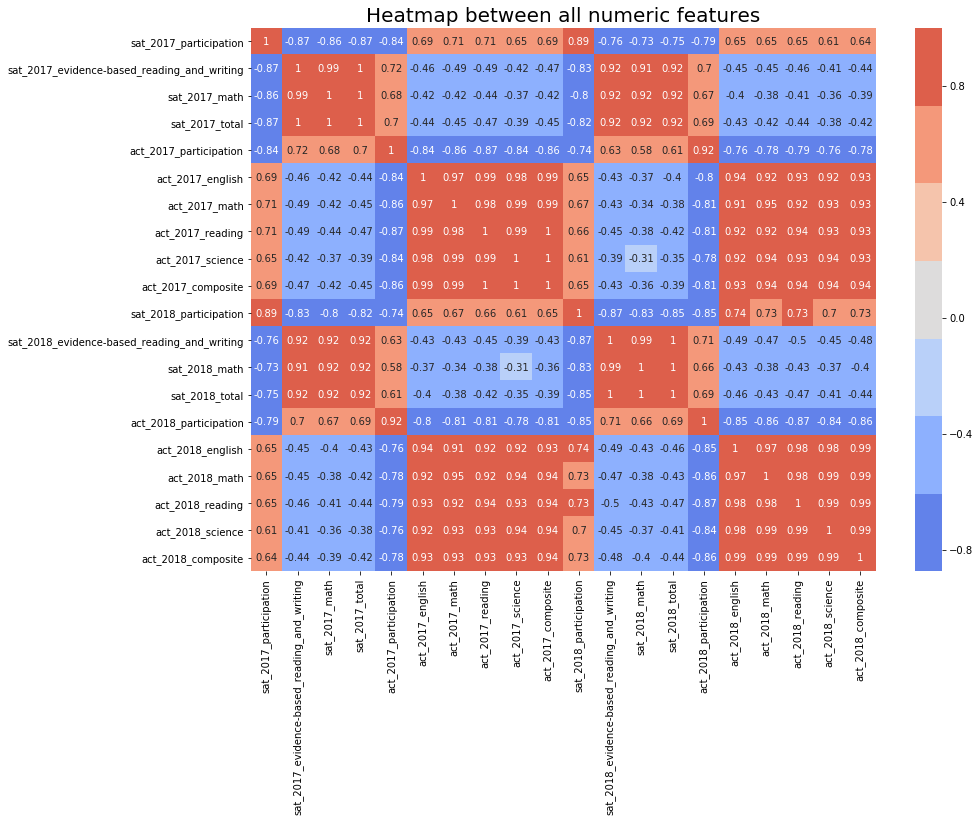

In [58]:
fig, ax = plt.subplots(1,1, figsize=(14,10));
sns.heatmap(final_df.corr(), annot=True, cmap=sns.color_palette("coolwarm", 7))
# Set the title.
ax.set_title('Heatmap between all numeric features', fontsize=20, y=1.02);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [59]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """
    Take names of 2+ columns and subplot histograms.
    
    Parameters
    ----------
    dataframe : DataFrame
        Tabular data to be plotted.
    list_of_columns : array_like
        List of column names for each subplot.
    list_of_titles : array_like
        List of titles for each subplot.
    list_of_xlabels : array_like
        List of x-axis labels for each subplot.
    """
    plt.style.use('seaborn-white') # Set aesthetic style of plot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14,10), sharey = True)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate.
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists.
        ax[i].hist(dataframe[column], bins=10)  # Plot histogram
        ax[i].set_title(list_of_titles[i], fontsize=14, y=1.02) # Set titles for each subplot
        ax[i].set_xlabel(list_of_xlabels[i]) # Set labels for each subplot
        ax[i].set_ylabel("Frequency") # Set labels for each subplot
        ax[i].yaxis.set_tick_params(labelbottom=True) # Enable tick labels on y axis
        plt.tight_layout() # Adjust spacing between subplots

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

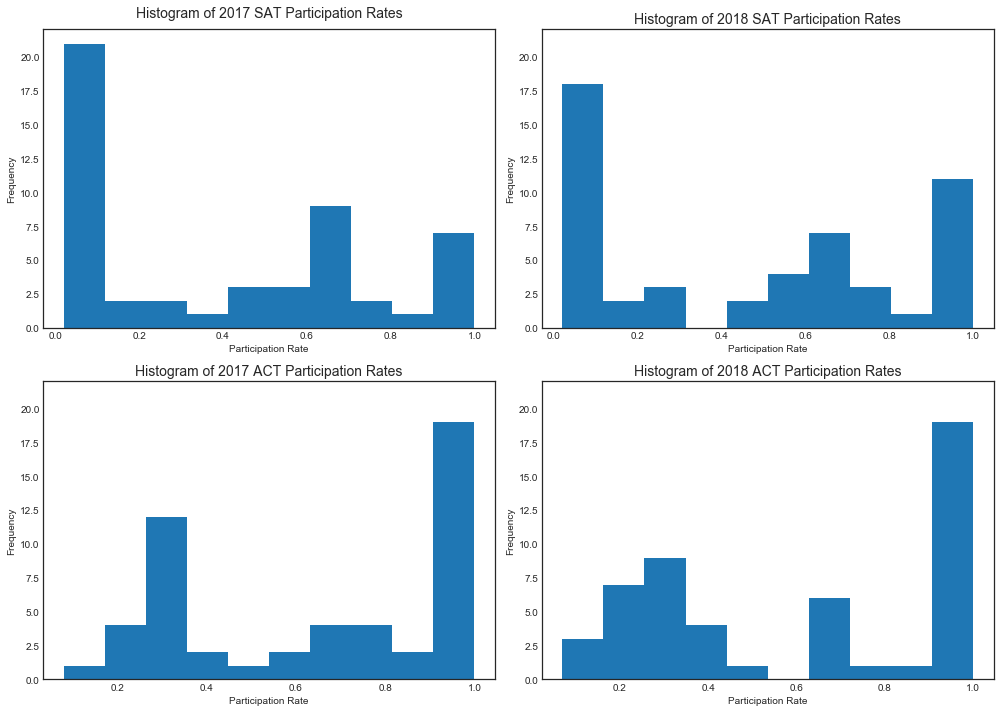

In [60]:
# Plot histograms for participation rates for SAT & ACT.
list_of_columns = [
    'sat_2017_participation',
    'sat_2018_participation',
    'act_2017_participation',
    'act_2018_participation'
]
list_of_titles = [
    "Histogram of 2017 SAT Participation Rates",
    "Histogram of 2018 SAT Participation Rates",
    "Histogram of 2017 ACT Participation Rates",
    "Histogram of 2018 ACT Participation Rates"
]
list_of_xlabels = [
    "Participation Rate",
    "Participation Rate",
    "Participation Rate",
    "Participation Rate"
]
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels)

- SAT rates are roughly multimodal with 3 possible peaks. The overall shape is skewed to the right.
- ACT rates are roughly multimodal with 3 possible peaks. The overall shape is skewed the left.

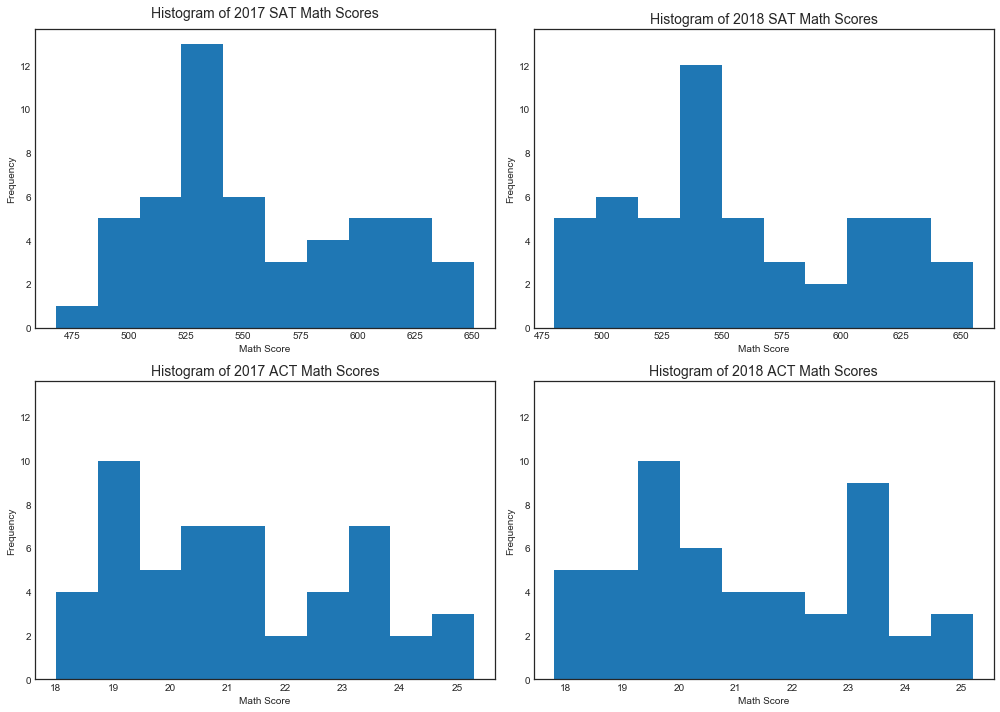

In [61]:
# Plot histograms for Math scores for SAT & ACT.
list_of_columns = [
    'sat_2017_math',
    'sat_2018_math',
    'act_2017_math',
    'act_2018_math'
]
list_of_titles = [
    "Histogram of 2017 SAT Math Scores",
    "Histogram of 2018 SAT Math Scores",
    "Histogram of 2017 ACT Math Scores",
    "Histogram of 2018 ACT Math Scores"
]
list_of_xlabels = [
    "Math Score",
    "Math Score",
    "Math Score",
    "Math Score"
]
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels)

- Math scores are roughly bimodal and right-skewed for SAT and ACT.

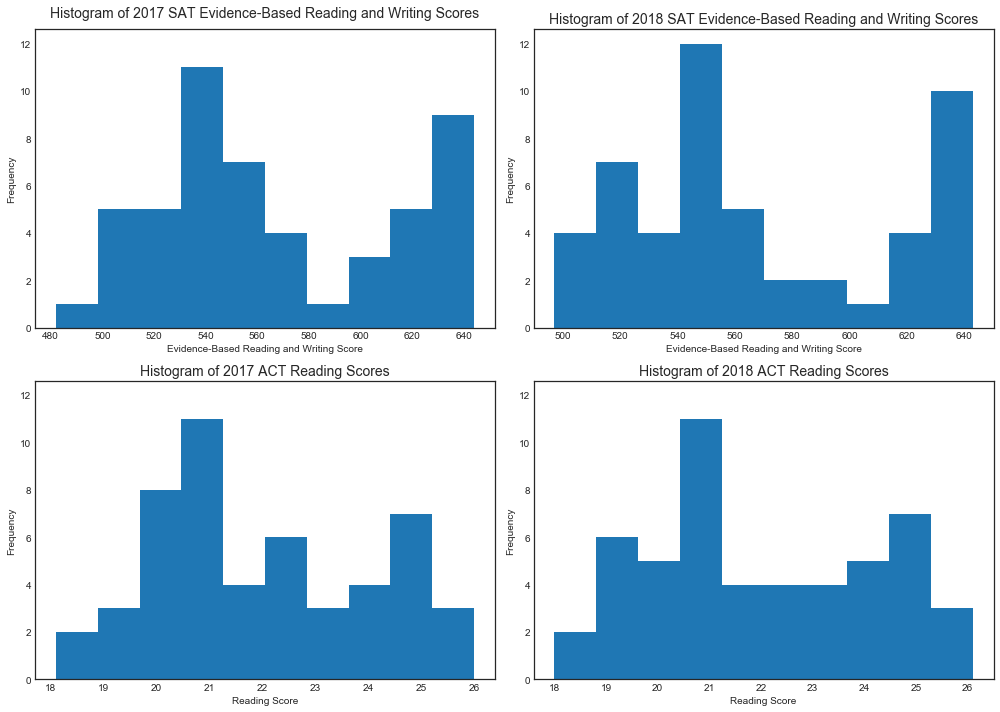

In [62]:
# Plot histograms for reading/verbal scores for SAT & ACT.
list_of_columns = [
    'sat_2017_evidence-based_reading_and_writing',
    'sat_2018_evidence-based_reading_and_writing',
    'act_2017_reading',
    'act_2018_reading'
]
list_of_titles = [
    "Histogram of 2017 SAT Evidence-Based Reading and Writing Scores",
    "Histogram of 2018 SAT Evidence-Based Reading and Writing Scores",
    "Histogram of 2017 ACT Reading Scores",
    "Histogram of 2018 ACT Reading Scores"
]
list_of_xlabels = [
    "Evidence-Based Reading and Writing Score",
    "Evidence-Based Reading and Writing Score",
    "Reading Score",
    "Reading Score"
]
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels)

- Reading/verbal scores are roughly bimodal and right-skewed for SAT and ACT.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [63]:
def scatter_plot(dataframe, x_col, y_col, title):
    """
    A scatter plot of y vs x.
    
    Parameters
    ----------
    dataframe : DataFrame
        Tabular data to be plotted.
    x_col : str
        Column name for x data.
    y_col : str
        Column name for y data.
    title : str
        Title of plot.
    """
    plt.style.use('seaborn-white') # Set aesthetic style of plot.
    final_df.plot(kind='scatter', x=x_col, y=y_col, figsize=(8,8), s=50) # Plot scatter plot.
    plt.title(title, fontsize=20, y=1.02) # Set title.
    plt.xlabel(x_col, fontsize=16) # Set x-axis label.
    plt.ylabel(y_col, fontsize=16) # Set y-axis label.

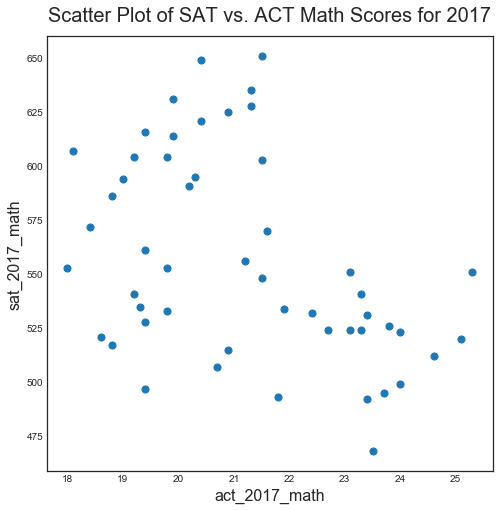

In [64]:
# Plot scatter plots for SAT vs. ACT math scores for 2017.
x_col = "act_2017_math"
y_col = "sat_2017_math"
title = "Scatter Plot of SAT vs. ACT Math Scores for 2017"
scatter_plot(final_df, x_col, y_col, title)

- There is a weak negative relationship between SAT and ACT math scores for 2017.

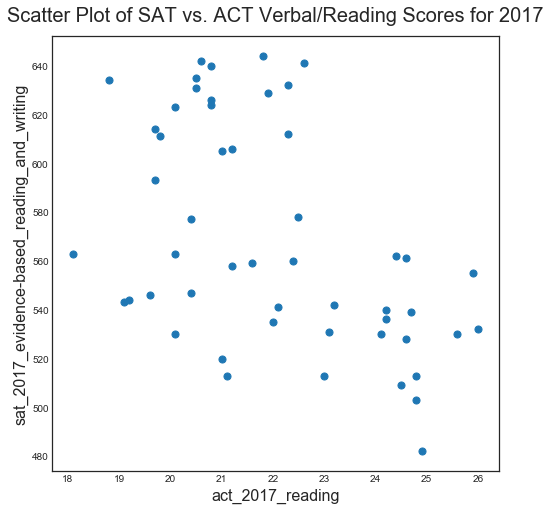

In [65]:
# Plot scatter plots for SAT vs. ACT verbal/reading scores for 2017.
x_col = "act_2017_reading"
y_col = "sat_2017_evidence-based_reading_and_writing"
title = "Scatter Plot of SAT vs. ACT Verbal/Reading Scores for 2017"
scatter_plot(final_df, x_col, y_col, title)

- There is a weak negative relationship between SAT and ACT verbal/reading scores for 2017.

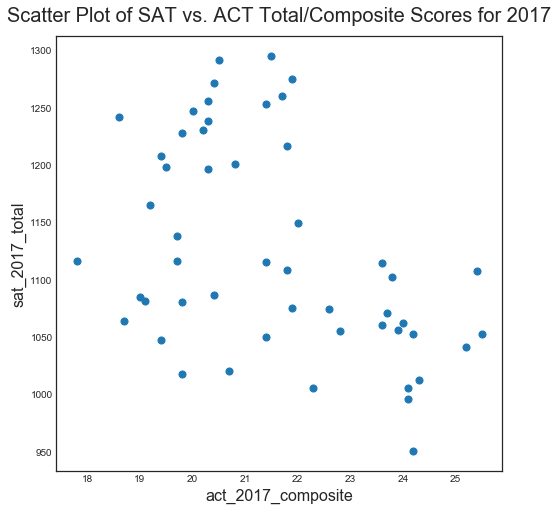

In [66]:
# Plot scatter plots for SAT vs. ACT total/composite scores for 2017.
x_col = "act_2017_composite"
y_col = "sat_2017_total"
title = "Scatter Plot of SAT vs. ACT Total/Composite Scores for 2017"
scatter_plot(final_df, x_col, y_col, title)

- There is a weak negative relationship between SAT and ACT total/composite scores for 2017.

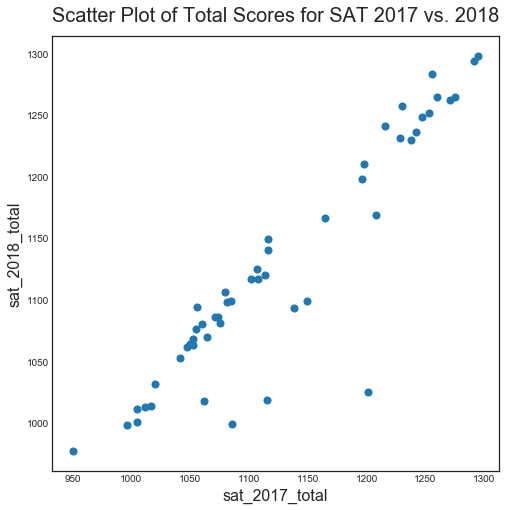

In [67]:
# Plot scatter plots for total scores for SAT 2017 vs. 2018.
x_col = "sat_2017_total"
y_col = "sat_2018_total"
title = "Scatter Plot of Total Scores for SAT 2017 vs. 2018"
scatter_plot(final_df, x_col, y_col, title)

- There is a strong, positive, linear relationship between SAT 2017 and 2018 total scores. There are a few potential outliers.

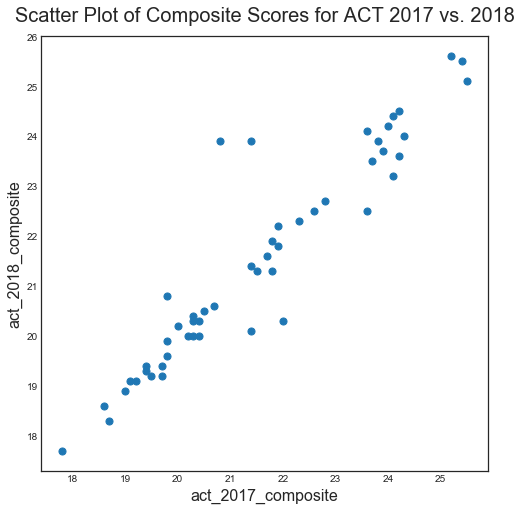

In [68]:
# Plot scatter plots for composite scores for ACT 2017 vs. 2018.
x_col = "act_2017_composite"
y_col = "act_2018_composite"
title = "Scatter Plot of Composite Scores for ACT 2017 vs. 2018"
scatter_plot(final_df, x_col, y_col, title)

- There is a strong, positive, linear relationship between ACT 2017 and 2018 total scores. There are a few potential outliers.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.02, 'Boxplot of 2017 vs. 2018 SAT and ACT Participation Rates')

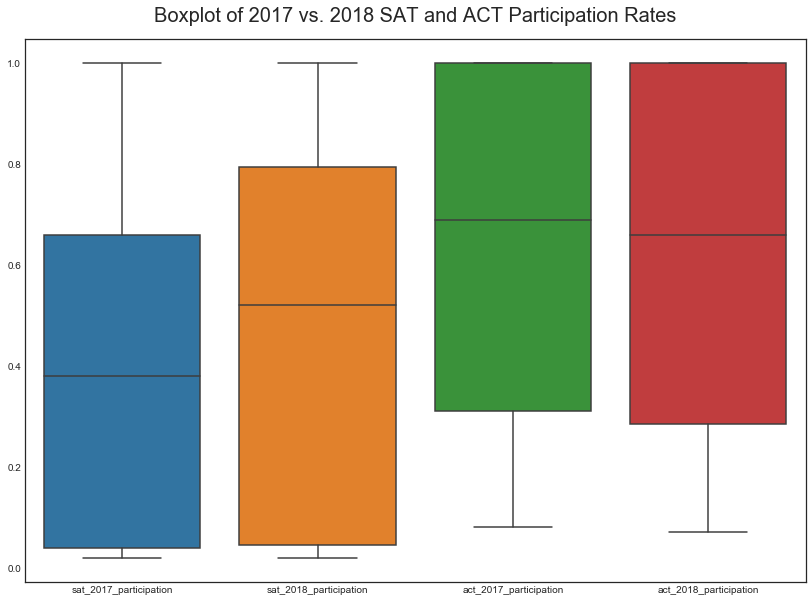

In [69]:
variables = [
    'sat_2017_participation',
    'sat_2018_participation',
    'act_2017_participation',
    'act_2018_participation'
]
fig, ax = plt.subplots(figsize=(14,10)) # Set plot figure.
ax = sns.boxplot(data=final_df[variables]) # Plot boxplots.
plt.title("Boxplot of 2017 vs. 2018 SAT and ACT Participation Rates", fontsize=20, y=1.02) # Set title.

- The long upper whiskers in SAT participation rates suggest right-skewness and the data may not be normally distributed.
- The long lower whiskers in ACT participation rates suggest left-skewness and the data may not be normally distributed.

Text(0.5, 1.02, 'Boxplot of 2017 vs. 2018 SAT Section Scores')

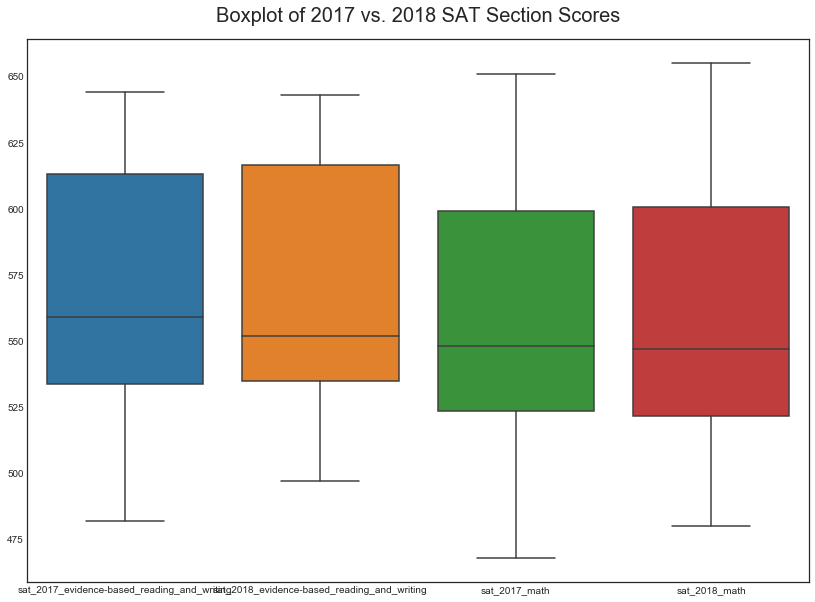

In [70]:
variables = [
    'sat_2017_evidence-based_reading_and_writing',
    'sat_2018_evidence-based_reading_and_writing',
    'sat_2017_math',
    'sat_2018_math'
]
fig, ax = plt.subplots(figsize=(14,10)) # Set plot figure.
ax = sns.boxplot(data=final_df[variables]) # Plot boxplots.
plt.title("Boxplot of 2017 vs. 2018 SAT Section Scores", fontsize=20, y=1.02) # Set title.

- Most scores are concentrated on the low end for all SAT section scores, suggesting that their distributions are skewed right. The ranges of scores are smaller in 2018 compared to 2017, but their median scores are lower.

Text(0.5, 1.02, 'Boxplot of 2017 vs. 2018 SAT Total Scores')

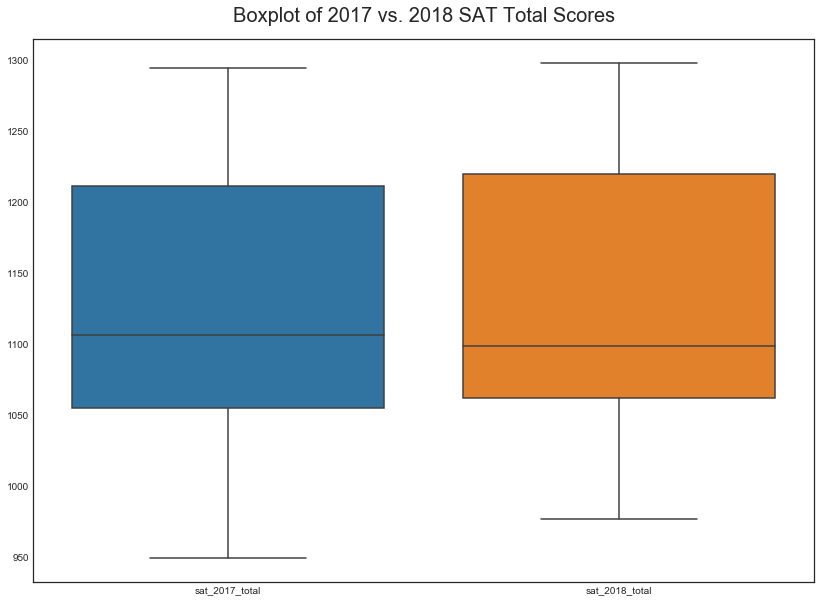

In [71]:
variables = [
    'sat_2017_total',
    'sat_2018_total'
]
fig, ax = plt.subplots(figsize=(14,10)) # Set plot figure.
ax = sns.boxplot(data=final_df[variables]) # Plot boxplots.
plt.title("Boxplot of 2017 vs. 2018 SAT Total Scores", fontsize=20, y=1.02) # Set title.

- Most scores are concentrated on the low end for SAT total scores, suggesting that their distributions are skewed right. The range of scores are smaller in 2018 compared to 2017, but the median score is also lower.

Text(0.5, 1.02, 'Boxplot of 2017 vs. 2018 ACT Scores')

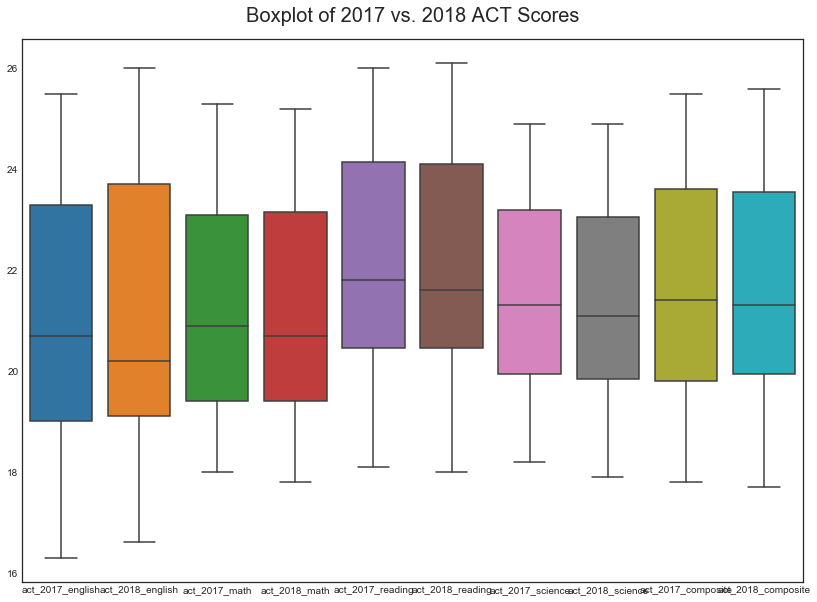

In [72]:
variables = [
    'act_2017_english',
    'act_2018_english',
    'act_2017_math',
    'act_2018_math',
    'act_2017_reading',
    'act_2018_reading',
    'act_2017_science',
    'act_2018_science',
    'act_2017_composite',
    'act_2018_composite'
]
fig, ax = plt.subplots(figsize=(14,10)) # Set plot figure.
ax = sns.boxplot(data=final_df[variables]) # Plot boxplots.
plt.title("Boxplot of 2017 vs. 2018 ACT Scores", fontsize=20, y=1.02) # Set title.

- Most scores are concentrated on the low end for SAT total scores, suggesting that their distributions are skewed right. The the median scores are also lower in 2018 compared to 2017.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

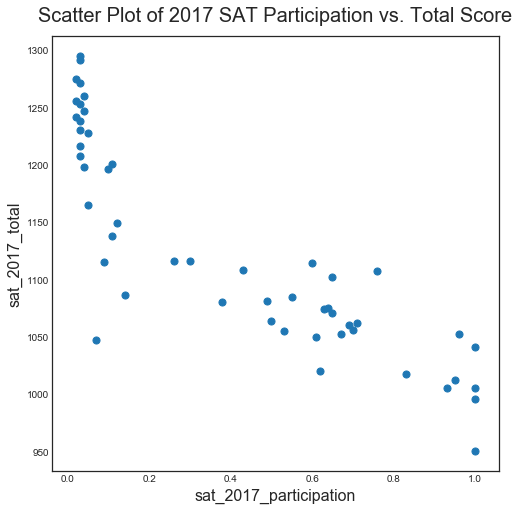

In [73]:
# Plot scatter plot for 2017 SAT participation vs. total score.
x_col = "sat_2017_participation"
y_col = "sat_2017_total"
title = "Scatter Plot of 2017 SAT Participation vs. Total Score"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2017 SAT participation and total score.

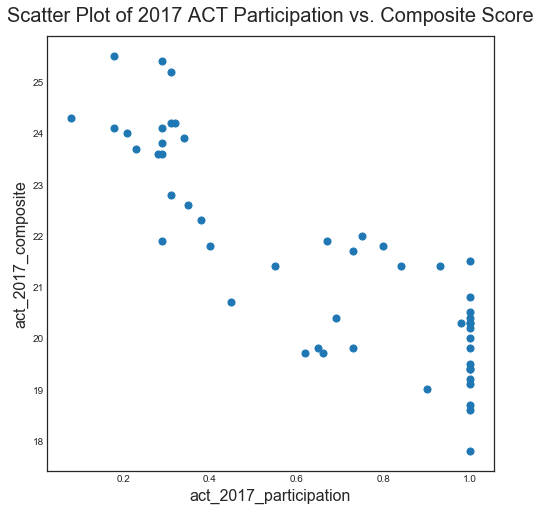

In [74]:
# Plot scatter plot for 2017 ACT participation vs. composite score.
x_col = "act_2017_participation"
y_col = "act_2017_composite"
title = "Scatter Plot of 2017 ACT Participation vs. Composite Score"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2017 ACT participation and composite score.

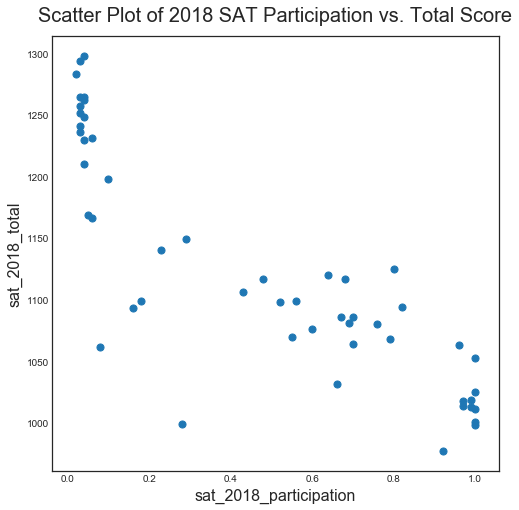

In [75]:
# Plot scatter plot for 2018 SAT participation vs. total score.
x_col = "sat_2018_participation"
y_col = "sat_2018_total"
title = "Scatter Plot of 2018 SAT Participation vs. Total Score"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2018 SAT participation and total score.

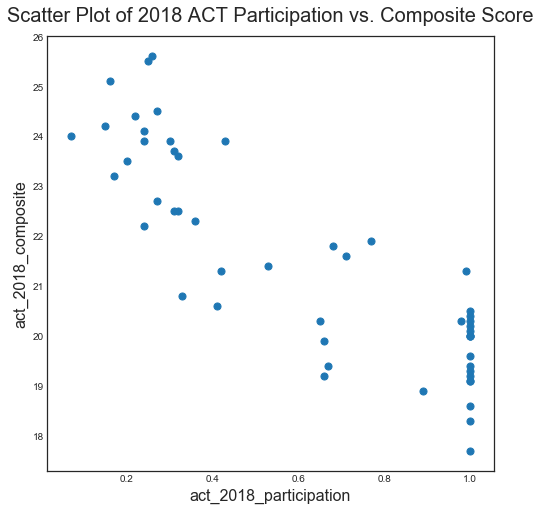

In [76]:
# Plot scatter plot for 2018 ACT participation vs. composite score.
x_col = "act_2018_participation"
y_col = "act_2018_composite"
title = "Scatter Plot of 2018 ACT Participation vs. Composite Score"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2018 ACT participation and composite score.

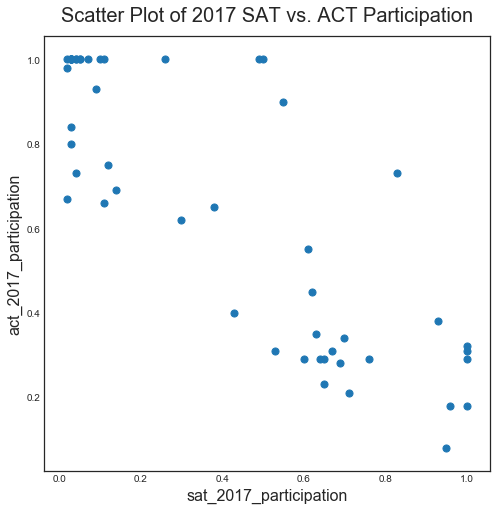

In [77]:
# Plot scatter plot for 2017 SAT vs ACT participation.
x_col = "sat_2017_participation"
y_col = "act_2017_participation"
title = "Scatter Plot of 2017 SAT vs. ACT Participation"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2017 SAT and ACT participation rates.

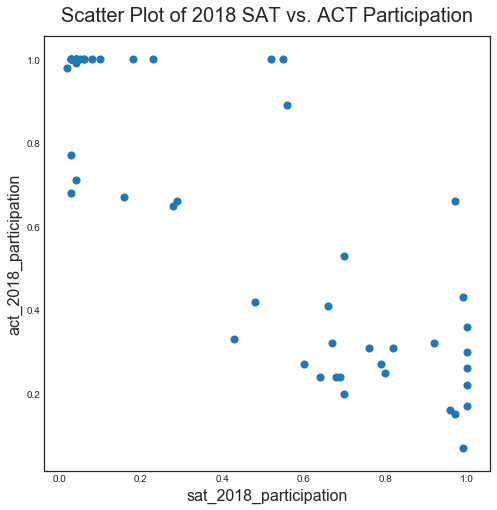

In [78]:
# Plot scatter plot for 2018 SAT vs ACT participation.
x_col = "sat_2018_participation"
y_col = "act_2018_participation"
title = "Scatter Plot of 2018 SAT vs. ACT Participation"
scatter_plot(final_df, x_col, y_col, title)

- There is a negative relationship between 2018 SAT and ACT participation rates.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

In [79]:
# Optional

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [80]:
# Generate summary statistics.
describe_df = final_df.describe().T[['mean','std','50%']]
# Rename column for middle quartile to median.
describe_df = describe_df.rename(columns={"50%": "median"})
# Generate skewness, assuming unimodal
describe_df['skew_from_unimodal'] = ['right' if(row['mean'] > row['median']) else 'left' for index, row in describe_df.iterrows()]
# Display mean (central tendency), standard deviation (spread), median and skewness from unimodal distribution.
describe_df

,mean,std,median,skew_from_unimodal
sat_2017_participation,0.398039,0.352766,0.38,right
sat_2017_evidence-based_reading_and_writing,569.117647,45.666901,559.00,right
sat_2017_math,556.882353,47.121395,548.00,right
sat_2017_total,1126.098039,92.494812,1107.00,right
act_2017_participation,0.652549,0.321408,0.69,left
act_2017_english,20.931373,2.353677,20.70,right
act_2017_math,21.182353,1.981989,20.90,right
act_2017_reading,22.013725,2.067271,21.80,right
act_2017_science,21.450980,1.739353,21.30,right
act_2017_composite,21.519608,2.020695,21.40,right


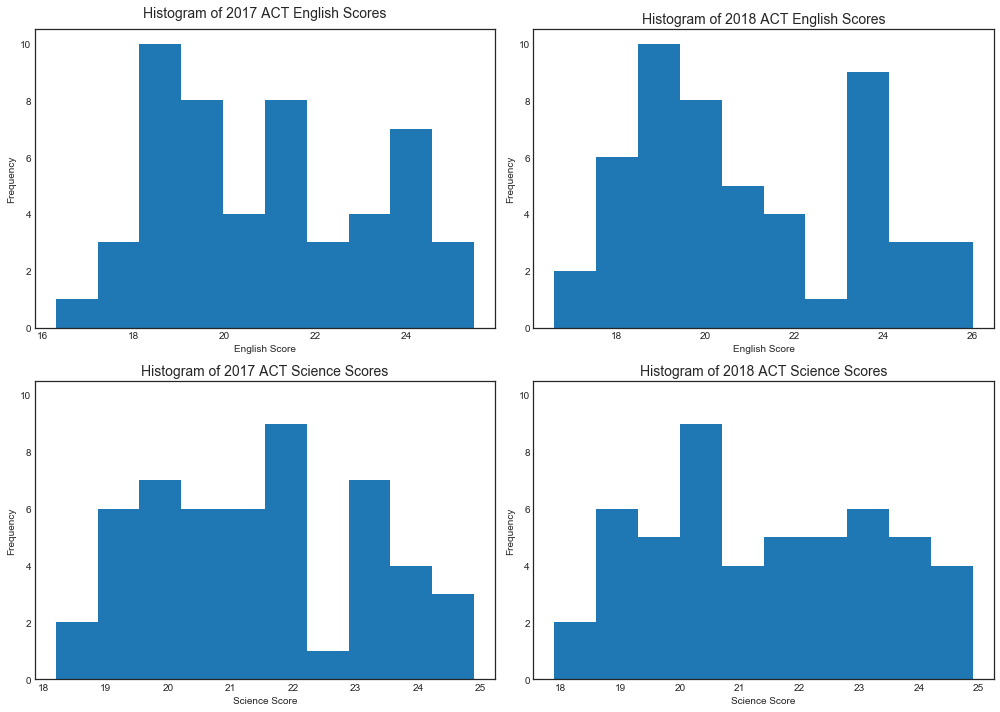

In [81]:
# Plot histograms for english and science scores for ACT.
list_of_columns = [
    'act_2017_english',
    'act_2018_english',
    'act_2017_science',
    'act_2018_science'
]
list_of_titles = [
    "Histogram of 2017 ACT English Scores",
    "Histogram of 2018 ACT English Scores",
    "Histogram of 2017 ACT Science Scores",
    "Histogram of 2018 ACT Science Scores"
]
list_of_xlabels = [
    "English Score",
    "English Score",
    "Science Score",
    "Science Score"
]
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels)

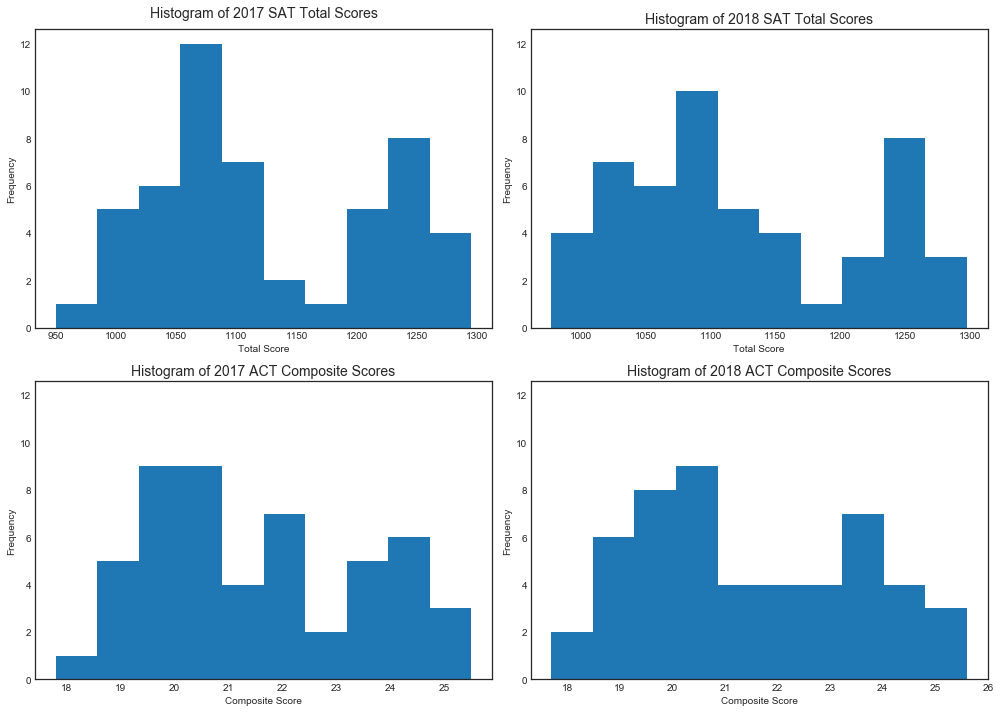

In [82]:
# Plot histograms for total/composite scores for SAT and ACT.
list_of_columns = [
    'sat_2017_total',
    'sat_2018_total',
    'act_2017_composite',
    'act_2018_composite'
]
list_of_titles = [
    "Histogram of 2017 SAT Total Scores",
    "Histogram of 2018 SAT Total Scores",
    "Histogram of 2017 ACT Composite Scores",
    "Histogram of 2018 ACT Composite Scores"
]
list_of_xlabels = [
    "Total Score",
    "Total Score",
    "Composite Score",
    "Composite Score"
]
subplot_histograms(final_df, list_of_columns, list_of_titles, list_of_xlabels)

From our histograms, including graphs plotted in previous sections:

- SAT participation rates are roughly multimodal. The overall shape is skewed to the right.
- ACT participation rates are roughly multimodal. The overall shape is skewed the left.
- All scores from each SAT and ACT test/subtest are roughly bimodal and right-skewed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

We do not observe this trend from our data.

We consider the data we have from each individual state as sample draws from the population of graduating high-school seniors in the United States of America. The Central Limit Theorem (CLT) states that the mean from our samples approximates a normal distribution when sample draw size is large enough, which we do have with a sample draw size of 51. However, each of our samples are not sampled randomly because the number of graduating seniors varies by state. This violates the randomization condition in CLT and therefore we should not expect a normal distribution from our data.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

As described above, the randomization condition in CLT does not hold, therefore we do not expect a normal distribution from our data.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

We noted in our earlier analysis that the our samples, i.e. participation rates reported in each state, are not randomly sampled. Given that the number of graduating seniors are different in each state, we cannot conduct statistical inference to make any propositions about the entire US population.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

Since none of the states contain graduating seniors with full participation rates in both SAT and ACT tests, it might not be appropriate to compare SAT and ACT math scores within the same year. Take the example of Minnesota with 100% participation rate in 2017 ACT but 3% participation rate in 2017 SAT, it is possible that graduating seniors who attempted both SAT and ACT are more focused and well-prepared for success. This is observed in our data where Minnesota has the highest 2017 SAT mean math and total scores. Given that the SAT math score is not representative of all graduating seniors from Minnesota, it would be inconclusive if we compare SAT math scores with that from ACT.

In [83]:
# States with top 5 2017 SAT math score
final_df.sort_values(by='sat_2017_math', ascending=False)[[
    'state','sat_2017_math','sat_2017_total','sat_2017_participation','act_2017_participation'
]].head(5)

,state,sat_2017_math,sat_2017_total,sat_2017_participation,act_2017_participation
23,Minnesota,651,1295,0.03,1.00
49,Wisconsin,649,1291,0.03,1.00
15,Iowa,635,1275,0.02,0.67
25,Missouri,631,1271,0.03,1.00
16,Kansas,628,1260,0.04,0.73


#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [84]:
# Since the CLT conditions are not met and we cannot approximate
# any of our variables to a normal distribution, we cannot run any
# hypothesis tests using methods that were discussed in class.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

1. [Colorado switched to SAT from ACT][id] in the 2017-18 academic year. This explains the significant drop in 2018 ACT participation rate when it had 100% participation rate in 2017. In addition, Colorado also had the highest SAT participation rate of 100% for the 2018 SAT.

[id]: https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/ "Colorado juniors face new, revamped college exam in SAT after state dumps rival ACT"

In [85]:
# Check year-to-year rate change on ACT for states with 100% participation in 2017.
df_working = final_df[final_df['act_2017_participation'] == final_df['act_2017_participation'].max()][['state', 'act_2017_participation', 'act_2018_participation']]
df_working = df_working.set_index('state')
df_working.T.pct_change().sort_values(by='act_2018_participation',axis=1)

state,Colorado,Minnesota,Alabama,Utah,Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,Montana,Missouri,Mississippi,Louisiana,Kentucky,Arkansas,Wisconsin,Wyoming
act_2017_participation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
act_2018_participation,-0.7,-0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2. Florida has the highest participation rates for both SAT and ACT combined in 2017 and 2018. This could be attributed to many [schools in Florida holding free SAT exams during a regular school day][id], which makes SAT more accessible to students.

[id]: https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html "SAT, ACT: Florida students lag behind national averages"

In [86]:
# Display top 5 states with highest participation rates of 2017 SAT and ACT combined.
display_df = final_df
display_df['sum_2017_participation'] = display_df[['sat_2017_participation','act_2017_participation']].apply(sum, axis=1)
display_df.sort_values(by='sum_2017_participation', ascending=False)[[
    'state', 'sum_2017_participation', 'sat_2017_participation','act_2017_participation'
]].head()

,state,sum_2017_participation,sat_2017_participation,act_2017_participation
9,Florida,1.56,0.83,0.73
40,South Carolina,1.50,0.50,1.00
33,North Carolina,1.49,0.49,1.00
11,Hawaii,1.45,0.55,0.90
8,District of Columbia,1.32,1.00,0.32


In [87]:
# Display top 5 states with highest participation rates of 2018 SAT and ACT combined.
display_df = final_df
display_df['sum_2018_participation'] = display_df[['sat_2018_participation','act_2018_participation']].apply(sum, axis=1)
display_df.sort_values(by='sum_2017_participation', ascending=False)[[
    'state', 'sum_2018_participation', 'sat_2018_participation','act_2018_participation'
]].head()

,state,sum_2018_participation,sat_2018_participation,act_2018_participation
9,Florida,1.63,0.97,0.66
40,South Carolina,1.55,0.55,1.00
33,North Carolina,1.52,0.52,1.00
11,Hawaii,1.45,0.56,0.89
8,District of Columbia,1.24,0.92,0.32


3. Oregon has SAT and ACT participation rates that are both less than 50% in 2017 and 2018. One possible influence on low participation rates is that some colleges and universities are test-optional, where SAT/ACT scores are not required in their admission requirements, [such as Western Oregon University][id].

[id]: https://www.statesmanjournal.com/story/news/education/2016/11/17/western-oregon-no-longer-requires-sat-act-scores/93505778/ "Western Oregon no longer requires SAT, ACT scores"

In [88]:
# Display participation rates for Oregon.
final_df[final_df['state'] == 'Oregon'][[
    'state', 'sat_2017_participation', 'act_2017_participation',
    'sat_2018_participation', 'act_2018_participation'
]]

,state,sat_2017_participation,act_2017_participation,sat_2018_participation,act_2018_participation
37,Oregon,0.43,0.4,0.48,0.42


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

- SAT and ACT are substitutes for one another.
- A greater number of states have high participation rates in ACT than SAT.
- Participation rates are highly influenced by state and local education policies.
- For states such as Oregon with a lower participation rate, SAT and ACT are usually optional and not part of the standard school curriculum. Therefore, students have to prepare for the test using their own resources. One suggestion for the SAT College Board would be to provide high quality, easily accessible test prep materials that are free or at reduced-cost. This will attract students who cannot afford tutors or classes to prepare for SAT instead of ACT given the lower cost barrier to entry. Students from states with mandatory ACT testing may also be encouraged to attempt SAT when test prep materials are readily available.
- Additional data that would be helpful include students who have taken both SAT and ACT, and whether the state subsidizes the cost of the test.